In [1]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import os
from sliding_window import batch_p_r

batch_p_r(dir_containing_preds, scaling, clust_r, cor_r, clip_val=None):

In [2]:
dir_containing_preds = './batch_50/'

In [6]:
batch_p_r(dir_containing_preds, 5, 150, 5000)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 921
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 684
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 933
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 595
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 955
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 705
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 507
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 L

{'Curb Cut': (0.4330357142857143, 1.0),
 'Missing Cut': (0.20000000000000001, 0.35294117647058826),
 'Obstruction': (0.035273368606701938, 1.0),
 'Sfc Problem': (nan, 0.0)}

In [62]:
prs_var_s = []

for s in range(1, 16):
    pr = batch_p_r(dir_containing_preds, s, 150, 250)
    prs_var_s.append(pr)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 52
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 34
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 294
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 69
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 182
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 279
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 22
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loade

Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 221
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 219
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 729
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 375
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 239
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 700
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 791
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 L

Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 735
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 769
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 816
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 813
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 699
Curb Cut       	0.03	0.08
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.32
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 978
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true

Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 1011
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 1057
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 914
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 624
Processing predictions for jjoh15-XlSFnNMeKV2gfgQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 176
Processing predictions for JkO-A5_fv92lHZgpUT4avA
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 774
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 593
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 L

Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 643
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 901
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 943
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 960
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 1014
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 769
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 1007
Processing predictions for wP8LaownYApLtGgtmim12A


Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 962
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 993
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 1035
Curb Cut       	0.02	0.08
Missing Cut    	0.01	0.06
Obstruction    	0.01	0.20
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 1063
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 943
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 1035
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 

Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 1030
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 856
Processing predictions for jjoh15-XlSFnNMeKV2gfgQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 625
Processing predictions for JkO-A5_fv92lHZgpUT4avA
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 909
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 773
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 828
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 962
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Lo

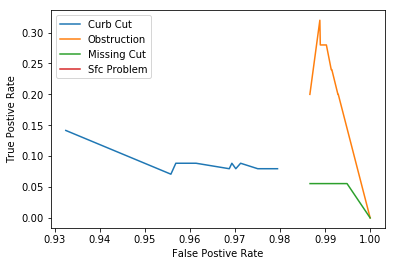

In [63]:
prs = prs_var_s

data = collections.defaultdict(list)

for i, s in enumerate( range(1, 16) ):
    pr = prs[i]
    
    for label in pr:
        tpr = pr[label][1]
        fpr = 1.0 - pr[label][0]
        
        data[label].append((tpr, fpr))

for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    pts = sorted(pts, key=lambda x: x[1])
    
    tprs, fprs = zip(*pts)
    plt.plot(fprs, tprs, label=label)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend() 
plt.show()

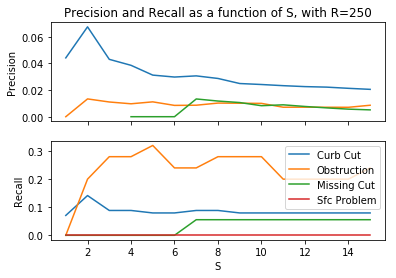

In [64]:
data = collections.defaultdict(list)

for i, s in enumerate( range(1, 16) ):
    pr = prs[i]
    
    for label in pr:
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((s, precision, recall))

fig, axs = plt.subplots(2,1,sharex=True)
for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    
    ss, precisions, recalls = zip(*pts)
    axs[0].plot(ss, precisions, label=label)
    axs[1].plot(ss, recalls, label=label)
axs[0].set_title("Precision and Recall as a function of S, with R=250")
plt.xlabel('S')
axs[0].set_ylabel('Precision')
axs[1].set_ylabel('Recall')
plt.legend() 
plt.show()

In [65]:
prs_var_r = []

for r in range(100, 501,10):
    pr = batch_p_r(dir_containing_preds, 4, 150, r)
    prs_var_r.append(pr)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 899
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 L

Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 L

Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 694
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.00	0.01
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.16
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 tru

Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jjoh15-XlSFnNMeKV2gfgQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 16
Processing predictions for JkO-A5_fv92lHZgpUT4avA
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 574
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Load

Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 

Curb Cut       	0.02	0.05
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.20
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 899
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 tru

Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 L

	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 694
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.04	0.09
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.28
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
P

Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 899
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jjoh15-XlSFnNMeKV2gfgQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 16
Processing predictions for JkO-A5_fv92lHZgpUT4avA
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 574
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Load

Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 

Curb Cut       	0.07	0.16
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.48
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 899
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 tru

Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 L

Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 694
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.08	0.19
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.56
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 tru

Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jjoh15-XlSFnNMeKV2gfgQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 16
Processing predictions for JkO-A5_fv92lHZgpUT4avA
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 574
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Load

Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 

Curb Cut       	0.11	0.25
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.64
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 899
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 tru

Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 403
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 L

Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Loaded 1091 predictions and 9 true labels
	 Clustered/ignored 1091 pts down to 694
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.11	0.25
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.68
Sfc Problem    	nan	0.00


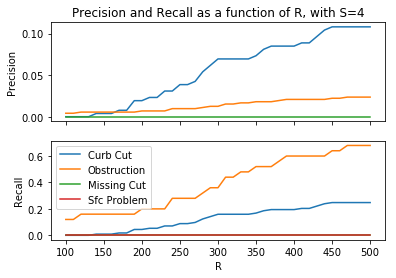

In [66]:
data = collections.defaultdict(list)

for i, r in enumerate( range(100, 501,10) ):
    pr = prs_var_r[i]
    
    for label in pr:
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((r, precision, recall))


fig, axs = plt.subplots(2,1,sharex=True)
for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    
    rs, precisions, recalls = zip(*pts)
    axs[0].plot(rs, precisions, label=label)
    axs[1].plot(rs, recalls, label=label)
axs[0].set_title("Precision and Recall as a function of R, with S=4")
plt.xlabel('R')
axs[0].set_ylabel('Precision')
axs[1].set_ylabel('Recall')
plt.legend() 
plt.show()

41
41


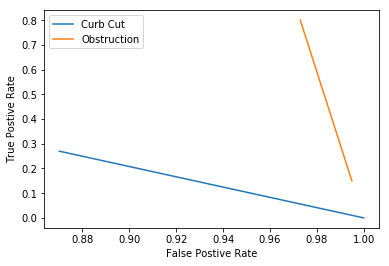

In [60]:
data = collections.defaultdict(list)

for i, s in enumerate( range(100, 501,10) ):
    pr = prs_var_r[i]
    
    for label in pr:
        tpr = pr[label][1]
        fpr = 1.0 - pr[label][0]
        
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((tpr, fpr))
        
for label, pts in data.iteritems():
    if label in ('Sfc Problem', "Missing Cut"): continue
    print len(pts)
    
    pts = sorted(pts, key=lambda x: x[1])
    
    tprs, fprs = zip(*pts)
    plt.plot(fprs, tprs, label=label)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend() 
plt.show()